# Aula 02 - Introdução ao PyTorch – Código

## Objetivo:
- Introduzir um código pode ser usado como base para aprendizado de máquina, abordando desde o pré-processamento de dados até a construção e avaliação de um modelo de rede neural simples usando PyTorch.

- Será apresentado o passo a passo de como carregar, preparar, treinar e avaliar um modelo de rede neural simples em Python utilizando as bibliotecas Pandas, NumPy, Scikit-learn e PyTorch.

## 🧰 Bibliotecas Utilizadas

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

### Explicação

| Biblioteca | Finalidade |
|-----------|------------|
| `pandas` | Manipulação e análise de dados (carregar CSVs, tratar dados) |
| `numpy` | Trabalho com arrays numéricos |
| `torch` | Construção e treinamento de redes neurais |
| `sklearn` | Divisão de conjuntos de treino/teste |

## 1️⃣ Carregamento do Dataset

In [2]:
df = pd.read_csv("exemplo_dataset2.csv")

### Explicação:

- Carrega os dados de um arquivo `.csv` para dentro de um DataFrame (`df`) usando `pandas`.
- O caminho `"exemplo_dataset2.csv"` deve apontar corretamente para o local onde o dataset está salvo.

### Dica:




Use `df.head()` para visualizar as primeiras linhas do dataset.

## 2️⃣ Criação da Coluna Alvo (`feedback_Bom`)

### Código

In [3]:
df['feedback'] = df['feedback'].fillna("Desconhecido")

In [4]:
df['feedback_Bom'] = (df['feedback'] == 'Bom').astype(int)

In [5]:
df.head(10)

,id,idade,renda,cidade,categoria,nota,feedback,feedback_Bom
0,1,30.0,1200.0,Sao Paulo,A,8.5,Bom,1
1,2,45.0,2500.0,Rio de Janeiro,B,7.0,Regular,0
2,3,29.0,1200.0,Belo Horizonte,A,5.5,Bom,1
3,4,55.0,3000.0,Salvador,B,NaN,Ruim,0
4,5,40.0,2100.0,Sao Paulo,A,9.0,Bom,1
5,6,23.0,900.0,NaN,B,7.5,Ruim,0
6,7,35.0,1800.0,Rio de Janeiro,B,6.8,Regular,0
7,8,38.0,2500.0,Belo Horizonte,A,8.2,Bom,1
8,9,29.0,1500.0,Salvador,B,7.1,Regular,0
9,10,50.0,2800.0,Sao Paulo,A,8.7,Bom,1


### Explicação:

- Cria uma nova coluna chamada `feedback_Bom`.
- Transforma a variável categórica `'feedback'` (valores como `'Bom'`, `'Ruim'`, etc.) em uma variável binária:
  - `1` se for `'Bom'`
  - `0` caso contrário- Cria uma nova coluna chamada `feedback_Bom`. 

### Por que isso é necessário?

Modelos de classificação binária trabalham com saídas numéricas (geralmente 0 ou 1). Essa transformação prepara o target para o modelo.

## 3️⃣ Tratamento de Valores Ausentes

### Código

In [6]:
df['feedback'] = df['feedback'].fillna("Desconhecido")
df['idade'] = df['idade'].fillna(df['idade'].median())
df['renda'] = df['renda'].fillna(df['renda'].mean())
df['nota']  = df['nota'].fillna(df['nota'].median())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            50 non-null     int64  
 1   idade         50 non-null     float64
 2   renda         50 non-null     float64
 3   cidade        45 non-null     object 
 4   categoria     50 non-null     object 
 5   nota          50 non-null     float64
 6   feedback      50 non-null     object 
 7   feedback_Bom  50 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ KB


In [8]:
df.isnull().sum()

id              0
idade           0
renda           0
cidade          5
categoria       0
nota            0
feedback        0
feedback_Bom    0
dtype: int64

### Explicação:

- Preenche valores ausentes (`NaN`) com estratégias diferentes por tipo:
  - Para texto (`feedback`): preenche com `"Desconhecido"`
  - Para números:
    - `idade`: mediana
    - `renda`: média
    - `nota`: mediana

### Por que tratar valores faltantes?

Algoritmos de machine learning geralmente não lidam bem com dados faltantes. É necessário tratá-los antes do treinamento.

## 4️⃣ Separação entre Features e Target + Divisão Treino/Teste

### Código

In [9]:
features = df[['idade', 'renda', 'nota']]
target   = df['feedback_Bom']

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.3, random_state=42)

In [10]:
features.head(5)

,idade,renda,nota
0,30.0,1200.0,8.5
1,45.0,2500.0,7.0
2,29.0,1200.0,5.5
3,55.0,3000.0,7.5
4,40.0,2100.0,9.0


In [11]:
target.head(5)

0    1
1    0
2    1
3    0
4    1
Name: feedback_Bom, dtype: int64

In [12]:
print (X_train)

    idade        renda  nota
6    35.0  1800.000000   6.8
41   52.0  3100.000000   8.8
46   49.0  3600.000000   8.5
47   28.0  1500.000000   7.2
15   27.0  1200.000000   5.4
9    50.0  2800.000000   8.7
16   36.0  1850.000000   8.9
24   34.0  2200.000000   6.9
34   37.0  1800.000000   7.8
31   53.0  2100.000000   9.4
0    30.0  1200.000000   8.5
44   20.0   980.000000   5.4
27   58.0  6000.000000   8.3
33   28.0  1400.000000   7.5
5    23.0   900.000000   7.5
29   40.0  2253.265306   7.1
11   46.0  2900.000000   6.0
36   43.0  2000.000000   8.2
1    45.0  2500.000000   7.0
21   55.0  4500.000000   9.5
2    29.0  1200.000000   5.5
43   45.0  3000.000000   6.3
35   38.0  2300.000000   6.7
23   60.0  5800.000000   9.1
40   33.0  2200.000000   7.7
10   40.0  1500.000000   9.2
22   47.0  3500.000000   7.3
18   39.0  2700.000000   6.2
49   41.0  2200.000000   7.6
20   22.0   950.000000   4.8
7    38.0  2500.000000   8.2
42   28.0  1500.000000   9.3
14   38.0  2100.000000   7.8
28   32.0  250

In [13]:
print (y_train)

6     0
41    0
46    1
47    0
15    0
9     1
16    1
24    0
34    0
31    1
0     1
44    1
27    1
33    1
5     0
29    0
11    0
36    1
1     0
21    1
2     1
43    0
35    0
23    1
40    0
10    1
22    0
18    1
49    0
20    0
7     1
42    1
14    1
28    1
38    0
Name: feedback_Bom, dtype: int64


In [14]:
print (X_test)

    idade   renda  nota
13   31.0  2300.0   8.0
39   42.0  1900.0   8.0
30   39.0  2800.0   6.0
45   38.0  2000.0   6.9
17   41.0  2500.0   7.7
48   36.0  1800.0   8.1
26   25.0   980.0   7.2
25   28.0  1200.0   5.0
32   24.0  1000.0   4.3
19   28.0  1600.0   7.5
12   50.0  3000.0   6.5
4    40.0  2100.0   9.0
37   59.0  3400.0   6.5
8    29.0  1500.0   7.1
3    55.0  3000.0   7.5


In [15]:
print (y_test)

13    1
39    1
30    0
45    0
17    0
48    1
26    0
25    1
32    0
19    0
12    0
4     1
37    0
8     0
3     0
Name: feedback_Bom, dtype: int64


### Explicação:

- Usar apenas as colunas numéricas "idade", "renda", "nota" como features
- `features`: são as variáveis explicativas (entradas do modelo)
- `target`: é o valor a ser previsto (saída do modelo)
- `test_size=0.3`: define proporção de dados para teste.
- Usa-se `train_test_split` para dividir os dados em:
  - **70% para treino**
  - **30% para teste**
  - Um para treinamento do modelo (X_train, y_train)
  - Outro para teste do modelo (X_test, y_test)
- Essa divisão é feita aleatoriamente , mas usando `random_state=42`, garantimos que sempre que executarmos o código, a divisão será a mesma.


**Dica**
- Se você omitir o parâmetro `test_size`, o padrão será **0.25**.
- Mas é recomendado definir explicitamente para manter controle sobre a proporção.

**Depois da divisão**
- `X_train`: [70% das linhas, colunas: idade, renda, nota]
- `y_train`: [70% das linhas, coluna: feedback_Bom]

- `X_test`:  [30% das linhas, colunas: idade, renda, nota]
- `y_test`:  [30% das linhas, coluna: feedback_Bom]

## 5️⃣ Conversão para Tensores PyTorch

### Código

In [16]:
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_t = torch.tensor(X_test.values, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

### Explicação:

Esse bloco de código converte os dados em formato NumPy (ou arrays) para tensores do PyTorch , que são necessários para trabalhar com modelos criados no PyTorch.

**Parte 1: X_train.values**
- X_train é um DataFrame do Pandas com as features (ex: idade, renda, nota).
- .values extrai apenas os valores numéricos como um array NumPy.

**Parte 2: torch.tensor(...)**
- Cria um tensor do PyTorch a partir do array NumPy.
- Um tensor é a estrutura básica usada no PyTorch para representar dados e realizar operações matemáticas.

**Parte 3: dtype=torch.float32**
- Define o tipo de dado do tensor como float32 .
- Por padrão, o PyTorch usa float32, mas é bom especificar para garantir compatibilidade com modelos e operações.

  
**Parte 4: .view(-1, 1)**
- Apenas usado em y_train e y_test.
- Transforma um vetor 1D (ex: [1, 0, 1]) em uma matriz coluna 2D (ex: [[1], [0], [1]]).
- Isso é necessário porque o modelo do PyTorch espera saídas no formato (batch_size, 1) , ou seja, uma coluna por amostra.

**Explicação do .view(-1, 1):**
- -1 significa "inferir automaticamente o tamanho dessa dimensão"
- 1 significa que queremos 1 coluna

- Converte os dados em tensores do PyTorch (formato exigido pelo framework).
- `dtype=torch.float32`: mantém os números em precisão simples (recomendado para deep learning).
- `.view(-1, 1)`: ajusta dimensão para formato compatível com funções de perda.

In [17]:
print(X_train_t.shape) 
print(y_train_t.shape) 

torch.Size([35, 3])
torch.Size([35, 1])


In [18]:
print(X_train_t) 

tensor([[3.5000e+01, 1.8000e+03, 6.8000e+00],
        [5.2000e+01, 3.1000e+03, 8.8000e+00],
        [4.9000e+01, 3.6000e+03, 8.5000e+00],
        [2.8000e+01, 1.5000e+03, 7.2000e+00],
        [2.7000e+01, 1.2000e+03, 5.4000e+00],
        [5.0000e+01, 2.8000e+03, 8.7000e+00],
        [3.6000e+01, 1.8500e+03, 8.9000e+00],
        [3.4000e+01, 2.2000e+03, 6.9000e+00],
        [3.7000e+01, 1.8000e+03, 7.8000e+00],
        [5.3000e+01, 2.1000e+03, 9.4000e+00],
        [3.0000e+01, 1.2000e+03, 8.5000e+00],
        [2.0000e+01, 9.8000e+02, 5.4000e+00],
        [5.8000e+01, 6.0000e+03, 8.3000e+00],
        [2.8000e+01, 1.4000e+03, 7.5000e+00],
        [2.3000e+01, 9.0000e+02, 7.5000e+00],
        [4.0000e+01, 2.2533e+03, 7.1000e+00],
        [4.6000e+01, 2.9000e+03, 6.0000e+00],
        [4.3000e+01, 2.0000e+03, 8.2000e+00],
        [4.5000e+01, 2.5000e+03, 7.0000e+00],
        [5.5000e+01, 4.5000e+03, 9.5000e+00],
        [2.9000e+01, 1.2000e+03, 5.5000e+00],
        [4.5000e+01, 3.0000e+03, 6

In [19]:
print(y_train_t) 

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.]])


In [20]:
print(X_test_t) 

tensor([[  31.0000, 2300.0000,    8.0000],
        [  42.0000, 1900.0000,    8.0000],
        [  39.0000, 2800.0000,    6.0000],
        [  38.0000, 2000.0000,    6.9000],
        [  41.0000, 2500.0000,    7.7000],
        [  36.0000, 1800.0000,    8.1000],
        [  25.0000,  980.0000,    7.2000],
        [  28.0000, 1200.0000,    5.0000],
        [  24.0000, 1000.0000,    4.3000],
        [  28.0000, 1600.0000,    7.5000],
        [  50.0000, 3000.0000,    6.5000],
        [  40.0000, 2100.0000,    9.0000],
        [  59.0000, 3400.0000,    6.5000],
        [  29.0000, 1500.0000,    7.1000],
        [  55.0000, 3000.0000,    7.5000]])


In [21]:
print(y_test_t) 

tensor([[1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.]])


## 6️⃣ Definição da Rede Neural Simples

### Código:


In [22]:
class SimpleNet(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNet, self).__init__()
        self.linear1 = nn.Linear(input_dim, 8)
        self.relu    = nn.ReLU()
        self.linear2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

### Explicação

Este é um exemplo de **definição de uma rede neural simples para classificação binária** no PyTorch. Ele herda da classe `nn.Module`, que é a base para todos os modelos em PyTorch.

A rede ( __init__) tem:
- Uma camada oculta com **8 neurônios**
- Função de ativação **ReLU** (Rectified Linear Unit)
- Uma saída com **1 neurônio** (para prever 0 ou 1)

- forward(self, x) - Este método define como os dados fluem pela rede durante o **forward pass** (propagação direta).
- Ordem das operações:
  1. Passa os dados pela primeira camada linear
  2. Aplica a função ReLU
  3. Passa pela segunda camada linear
  4. Retorna o resultado final (logits)

### 📊 Exemplo Visual do Fluxo

Suponha que sua entrada tenha 3 features: `[idade, renda, nota]`.

```
Entrada (x) → [25, 3000, 8.5]

       ┌──────────────┐
       │ Linear1(3,8) │ → 8 valores
       └──────────────┘
              ↓
       ┌──────────────┐
       │     ReLU     │ → mantém só os positivos
       └──────────────┘
              ↓
       ┌──────────────┐
       │ Linear2(8,1) │ → 1 valor (logit)
       └──────────────┘
```

Esse valor final é usado para decidir se a predição é `0` ou `1`.

### Código

In [23]:
input_dim = X_train_t.shape[1]  # Quantidade de colunas em X
model = SimpleNet(input_dim)

In [24]:
print (input_dim)

3


In [25]:
print(model)

SimpleNet(
  (linear1): Linear(in_features=3, out_features=8, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=8, out_features=1, bias=True)
)


### Arquitetura da Rede:


- **Entrada**: `input_dim` (número de features)
- **Camada Oculta**: 8 neurônios com ativação ReLU
- **Saída**: 1 neurônio (para classificação binária)

### Funções Importantes:


- `nn.Linear`: faz a combinação linear (pesos + bias)
- `nn.ReLU`: função de ativação não-linear


#### Linha a Linha


`input_dim = X_train_t.shape`

**Explicação:**

- `X_train_t` é um tensor do PyTorch contendo os dados de treino (apenas as features, ou seja, variáveis de entrada).
- `.shape` retorna as dimensões do tensor no formato: (número_de_amostras, úmero_de_características)
- `[1]` acessa a segunda posição , ou seja, o número de colunas (ou características/variáveis de entrada)
  
**Exemplo:**
Se X_train_t tem forma (700, 3), isso significa que:

- Há 700 amostras
- Cada amostra tem 3 características (por exemplo: idade, renda, nota)
-  Então input_dim = 3
  
**Por que isso é importante?**
A rede neural precisa saber quantas entradas ela vai receber para configurar corretamente a primeira camada.


## 7️⃣ Configuração do Treinamento


### Código

In [26]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

### Explicação:

Esses são dois componentes essenciais para treinar um modelo de aprendizado de máquina ou deep learning no PyTorch.

- **Função de Perda**:
  - `BCEWithLogitsLoss`: Essa função é usada para problemas de classificação binária (duas classes: 0 e 1).
  - Se o modelo retorna logits = [2.5, -1.0] e os verdadeiros rótulos são [1, 0], essa função calcula o quanto o modelo errou.
- **Otimizador**:
  - Define o otimizador Adam , que será usado para atualizar os pesos do modelo durante o treinamento
  - Ajusta automaticamente a taxa de aprendizado para cada parâmetro durante o treino
  - `model.parameters()`: todos os parâmetros (pesos e biases) do modelo que podem ser aprendidos

- **Taxa de Aprendizado**
  - `lr=0.01`: taxa de aprendizado (ajusta quão rápido o modelo aprende)
  - Controla o tamanho dos passos que o otimizador dá para ajustar os pesos
  - Um valor muito alto pode fazer o modelo não convergir
  - Um valor muito baixo pode deixar o treinamento muito lento

## 8️⃣ Loop de Treinamento

In [27]:
# Qt de fases de treinamenro
epochs = 10
# Lista para guardar o valor da loss em cada época
losses = []  

for epoch in range(epochs):
    # forward
    ## faz a predição com base nos dados de entrada
    outputs = model(X_train_t)
    ## compara essas previsões com os verdadeiros rótulos (y_train_t) e calcula o erro (loss)
    loss = criterion(outputs, y_train_t)

    # backward
    ## Zera os gradientes acumulados nas etapas anteriores
    ## Se não zerar, os gradientes vão se somar e causar atualizações erradas nos pesos
    optimizer.zero_grad()

    ## Faz o cálculo dos gradientes de erro em relação aos pesos do modelo
    ## É o coração do backpropagation    
    loss.backward()

    ## Usa os gradientes calculados para atualizar os pesos do modelo
    ## O otimizador (Adam, neste caso) decide como ajustar os pesos
    optimizer.step()

    # Armazenar loss
    losses.append(loss.item())

    # imprimir estatísticas
    if (epoch+1) % 2 == 0:
        print(f"Época [{epoch+1}/{epochs}], Perda Treino: {loss.item():.4f}")

Época [2/10], Perda Treino: 150.9804
Época [4/10], Perda Treino: 121.7398
Época [6/10], Perda Treino: 95.9159
Época [8/10], Perda Treino: 73.5485
Época [10/10], Perda Treino: 54.6127


### Passos do Treinamento:

Este é o loop principal de treinamento do modelo de rede neural.
Ele executa o treinamento por um número fixo de épocas (neste caso, 10) . Em cada época:
- O modelo faz uma predição (forward) 
- Calcula o erro (loss) entre a predição e os valores reais 
- Atualiza os pesos da rede usando backpropagation
- Mostra o progresso a cada 2 épocas
  
**Fases:**
1. **Forward Pass**: modelo faz predição
2. **Cálculo da Perda**: compara previsão com valor real
3. **Backward Pass**: calcula gradientes
4. **Atualização dos Pesos**: otimizador atualiza parâmetros
5. **Exibição de Progresso**: mostra a perda a cada 2 épocas


### O que é uma época?

Uma época corresponde a uma passagem completa pelos dados de treino.


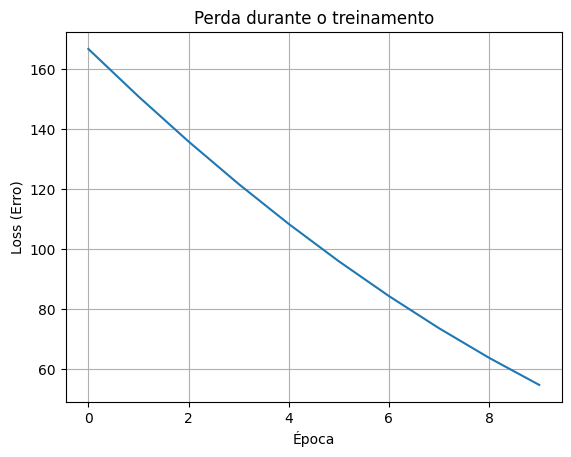

In [28]:
# ----------------------------------------------------------
# 8) GERAR GRÁFICO DA PERDA AO LONGO DAS ÉPOCAS
# ----------------------------------------------------------
plt.plot(losses)
plt.title("Perda durante o treinamento")
plt.xlabel("Época")
plt.ylabel("Loss (Erro)")
plt.grid(True)
plt.show()

## 9️⃣ Avaliação do Modelo no Conjunto de Teste

In [29]:
with torch.no_grad():
    logits_test = model(X_test_t)
    
    # Transformar logits em probabilidades [0..1]
    probs_test = torch.sigmoid(logits_test)

    # prob > 0.5 => classe = 1 (Bom)
    preds_test = (probs_test > 0.5).float()

    acertos = (preds_test == y_test_t).sum().item()
    total = y_test_t.shape[0]
    acuracia_test = acertos / total * 100.0

print(f"Acurácia no teste: {acuracia_test:.2f}%")

Acurácia no teste: 66.67%


### Etapas da Avaliação:


1. **Previsões no conjunto de teste**
2. **Conversão de logits para probabilidades** com `sigmoid`
3. **Classificação final** usando limiar de 0.5
4. **Cálculo da acurácia**: percentual de previsões corretas


### Resultado:

- Mostra a **porcentagem de acerto** do modelo nos dados de teste.

# 📝 Resumo Final

| Etapa | Descrição |
|-------|-----------|
| Carregar dados | Usamos `pd.read_csv()` |
| Limpeza de dados | Substituímos valores ausentes |
| Preparação do target | Criamos uma variável binária |
| Divisão de dados | Usamos `train_test_split` |
| Conversão para tensores | Compatibilizamos com PyTorch |
| Definição do modelo | Rede neural simples com duas camadas |
| Treinamento | Usamos loop com forward/backward propagation |
| Avaliação | Calculamos a acurácia no conjunto de teste |

# 💡 Dicas Extras

- Para melhorar o desempenho:
  - Aumentar número de épocas
  - Adicionar mais camadas ocultas
  - Fazer normalização das features
- Para evitar overfitting:
  - Usar validação cruzada
  - Adicionar regularização (Dropout, L2)
- Use `model.eval()` durante a inferência

# ✅ Atividade Proposta para os Alunos

1. Modifique o número de épocas e veja o impacto na acurácia.
2. Altere a taxa de aprendizado (`lr`) e observe mudanças no comportamento do treino.
3. Adicione mais uma camada oculta à rede e compare resultados.
4. Tente incluir a coluna `cidade` como feature (dica: use `OneHotEncoder` do `sklearn`).

...





---



